# Music Genre Classification 
## Group 8

### Libraries used

In [33]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
sb.set()


### Reading the Dataset

In [34]:
music_df = pd.read_csv('music_genre.csv')
music_df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


## Exploratory Analysis

### Checking number of rows and columns in the Dataset

In [35]:
print("Data type : ", type(music_df))
print("Data dims : ", music_df.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (50005, 18)


### Data types of each variables

In [36]:
print(music_df.dtypes)

instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
obtained_date        object
valence             float64
music_genre          object
dtype: object


In [37]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

### Selecting variables for Exploratory Analysis 

In [38]:
music = pd.DataFrame(music_df[["popularity", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence"]])

In [39]:
music.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,27.0,0.00468,0.652,0.941,0.79200,0.115,-5.201,0.0748,100.889,0.759
1,31.0,0.01270,0.622,0.890,0.95000,0.124,-7.043,0.0300,115.00200000000001,0.531
2,28.0,0.00306,0.620,0.755,0.01180,0.534,-4.617,0.0345,127.994,0.333
3,34.0,0.02540,0.774,0.700,0.00253,0.157,-4.498,0.2390,128.014,0.270
4,32.0,0.00465,0.638,0.587,0.90900,0.157,-6.266,0.0413,145.036,0.323


### Number of missing values

In [40]:
music.isnull().sum()

popularity          5
acousticness        5
danceability        5
energy              5
instrumentalness    5
liveness            5
loudness            5
speechiness         5
tempo               5
valence             5
dtype: int64

## Cleaning the Dataset

### Converting 'tempo' from type object to float 

In [41]:
music['tempo'] = pd.to_numeric(music['tempo'], errors = 'coerce')

### Dropping rows where input is NaN

In [42]:
music_df['tempo'] = pd.to_numeric(music_df['tempo'], errors = 'coerce')
music_df = music_df.dropna()
print("Data dims : ", music_df.shape)

Data dims :  (45020, 18)


In [43]:
music = music.dropna()
print("Data dims : ", music.shape)

Data dims :  (45020, 10)


In [44]:
music.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45020 entries, 0 to 50004
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        45020 non-null  float64
 1   acousticness      45020 non-null  float64
 2   danceability      45020 non-null  float64
 3   energy            45020 non-null  float64
 4   instrumentalness  45020 non-null  float64
 5   liveness          45020 non-null  float64
 6   loudness          45020 non-null  float64
 7   speechiness       45020 non-null  float64
 8   tempo             45020 non-null  float64
 9   valence           45020 non-null  float64
dtypes: float64(10)
memory usage: 3.8 MB


In [45]:
music.describe()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000
mean,44.263327,0.306596,0.558532,0.599553,0.181843,0.193951,-9.137016,0.093783,119.952961,0.456394
std,15.553972,0.341391,0.178858,0.264510,0.325847,0.161715,6.156400,0.101469,30.641701,0.247161
min,0.000000,0.000000,0.059600,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000
25%,34.000000,0.020100,0.442000,0.432000,0.000000,0.096900,-10.860000,0.036100,94.941500,0.257000
50%,45.000000,0.145000,0.568000,0.642000,0.000159,0.126000,-7.284000,0.048900,119.879000,0.448000
75%,56.000000,0.551000,0.687000,0.815250,0.154000,0.244000,-5.177000,0.098800,140.471250,0.648000
max,99.000000,0.996000,0.986000,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000


## Visual Analysis

### Plotting boxplot, histogram and violin plot for each variable

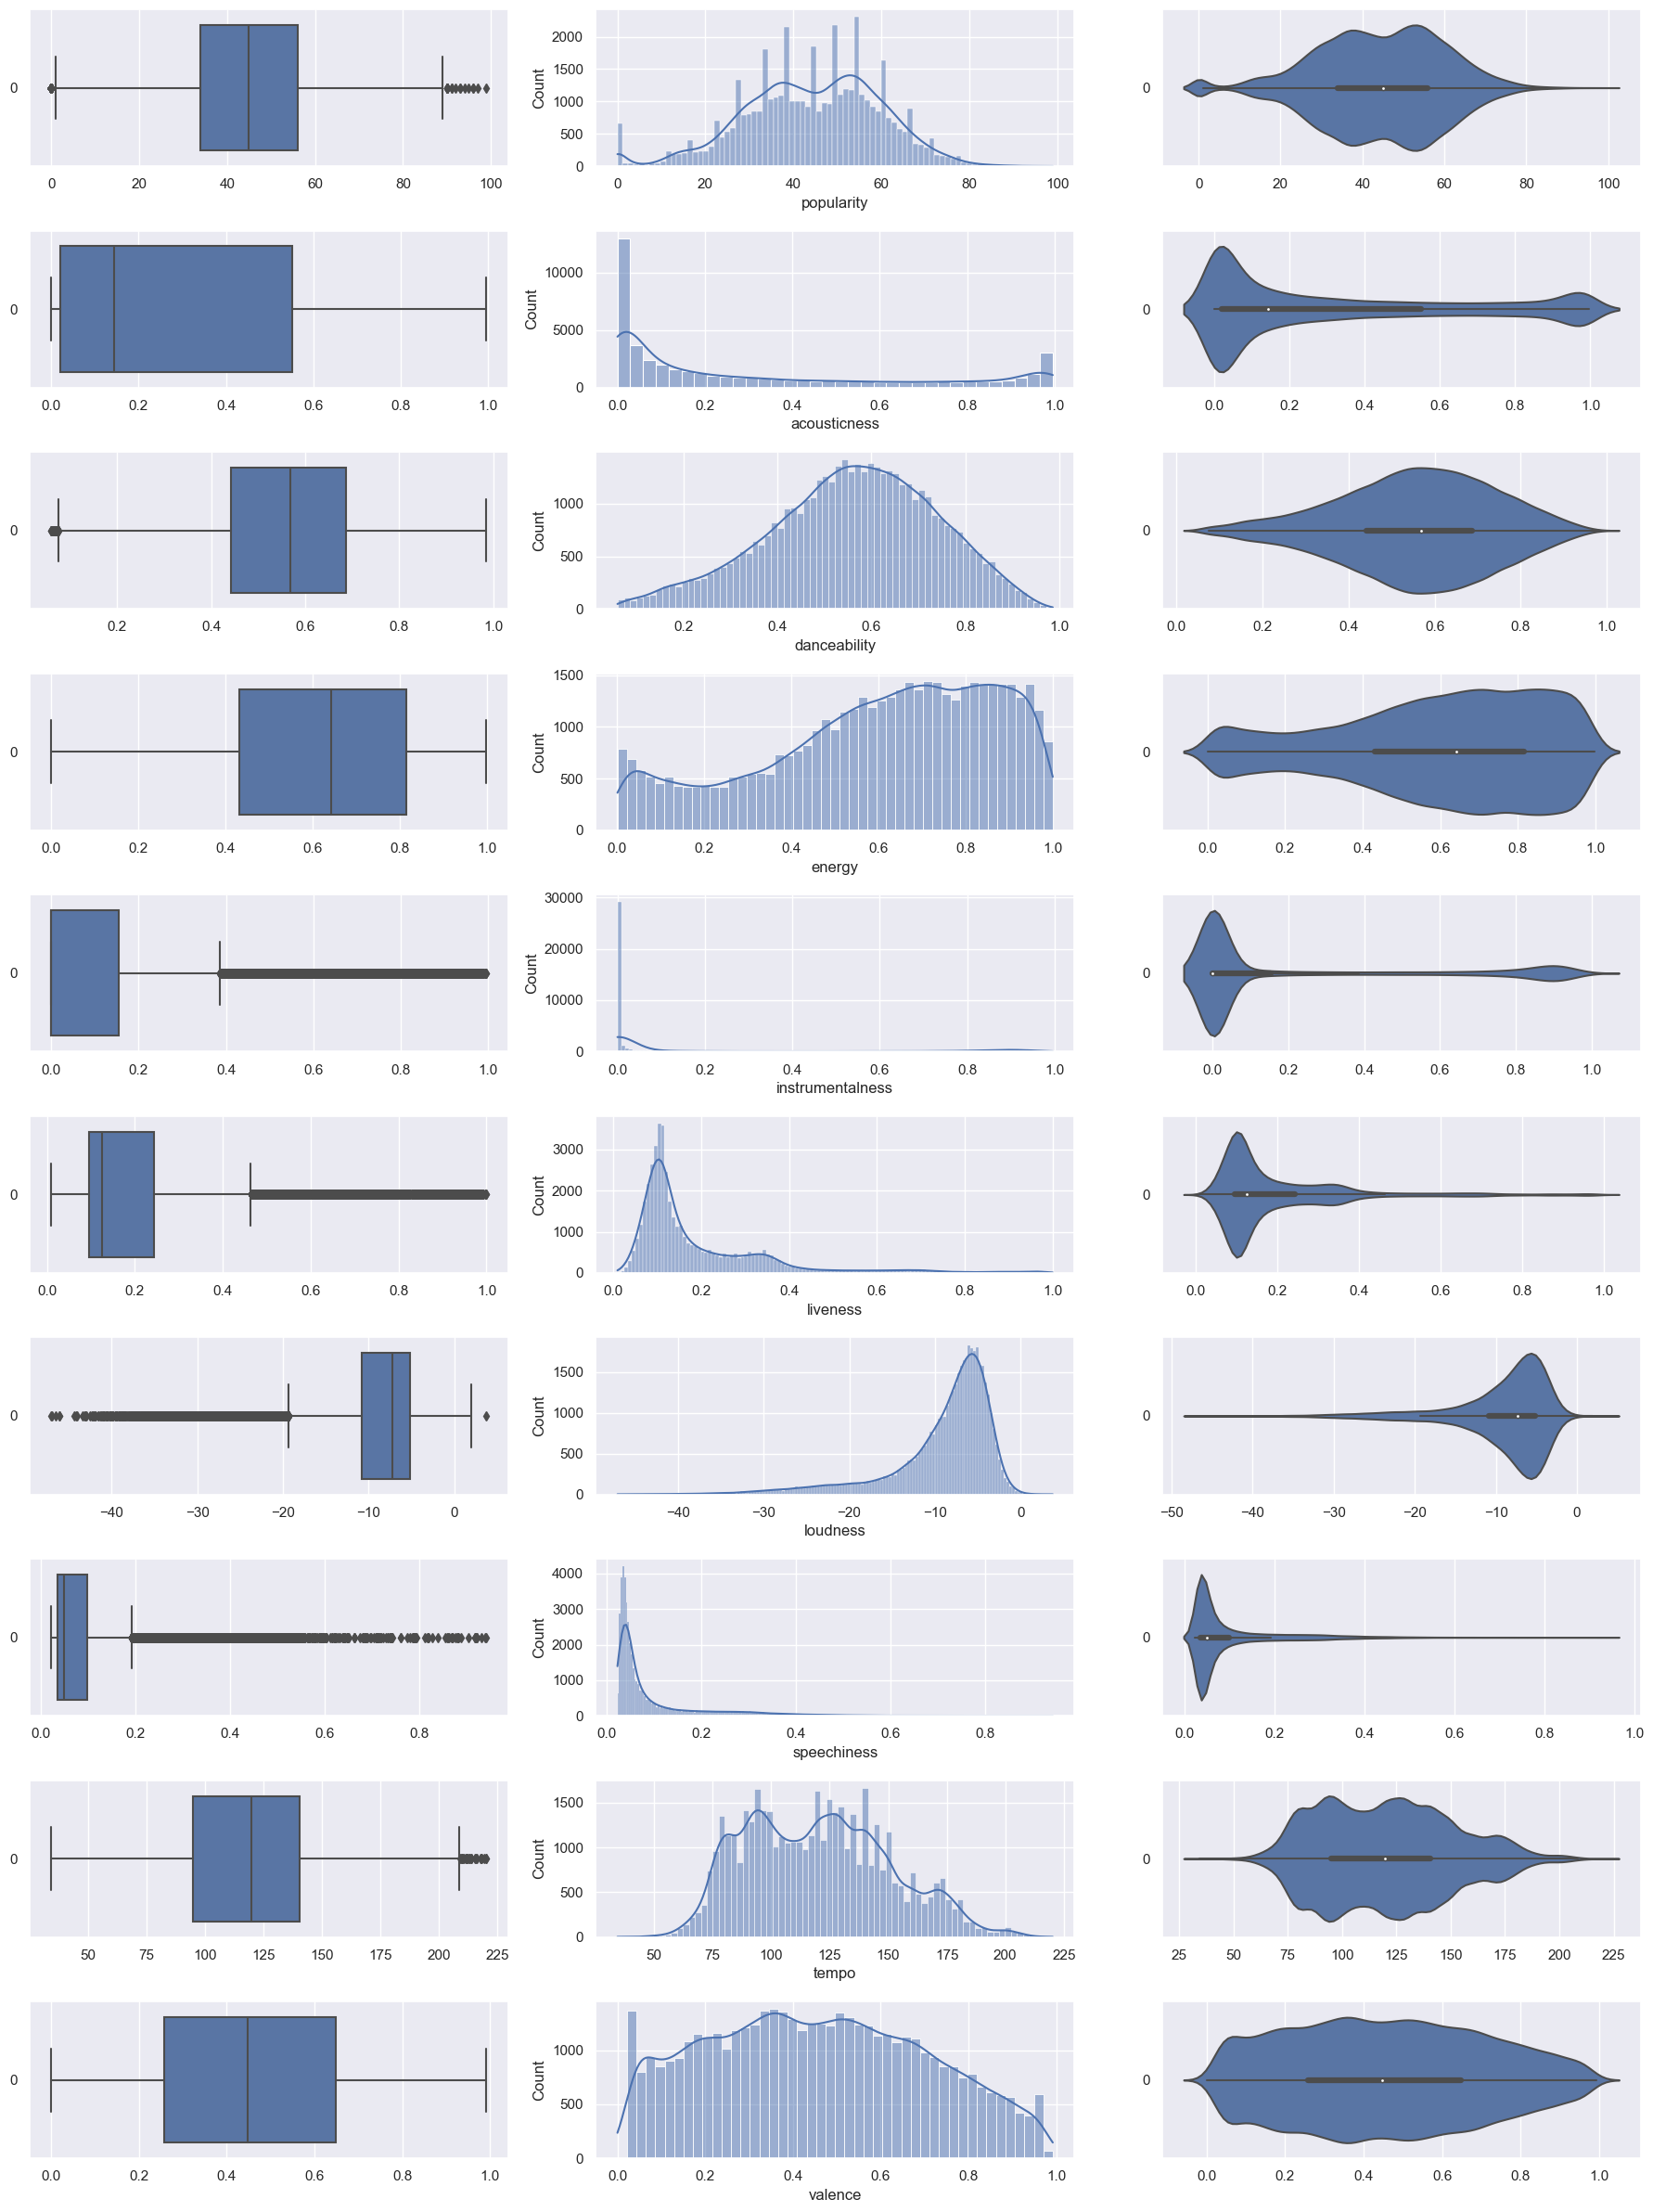

In [46]:
f, axes = plt.subplots(10, 3, figsize = (18, 24))

count = 0
for var in music:
    sb.boxplot(data = music[var], orient = "h", ax = axes[count, 0])
    sb.histplot(data = music[var], kde = True, ax = axes[count, 1])
    sb.violinplot(data = music[var], orient = "h", ax = axes[count, 2])
    count += 1

plt.tight_layout()
plt.show()

### Finding correlation between variables

In [47]:
music.corr()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.292279,0.357465,0.217278,-0.366275,-0.041857,0.319556,0.223405,0.032843,0.127091
acousticness,-0.292279,1.000000,-0.349019,-0.790731,0.390010,-0.108187,-0.730073,-0.165213,-0.232658,-0.272745
danceability,0.357465,-0.349019,1.000000,0.264175,-0.299755,-0.052700,0.390295,0.281113,-0.015223,0.433316
energy,0.217278,-0.790731,0.264175,1.000000,-0.391222,0.186015,0.838503,0.158485,0.261866,0.397014
instrumentalness,-0.366275,0.390010,-0.299755,-0.391222,1.000000,-0.093945,-0.529379,-0.199144,-0.126628,-0.272099
liveness,-0.041857,-0.108187,-0.052700,0.186015,-0.093945,1.000000,0.124664,0.113494,0.039681,0.049305
loudness,0.319556,-0.730073,0.390295,0.838503,-0.529379,0.124664,1.000000,0.165739,0.239361,0.342019
speechiness,0.223405,-0.165213,0.281113,0.158485,-0.199144,0.113494,0.165739,1.000000,0.066723,0.060172
tempo,0.032843,-0.232658,-0.015223,0.261866,-0.126628,0.039681,0.239361,0.066723,1.000000,0.104646
valence,0.127091,-0.272745,0.433316,0.397014,-0.272099,0.049305,0.342019,0.060172,0.104646,1.000000


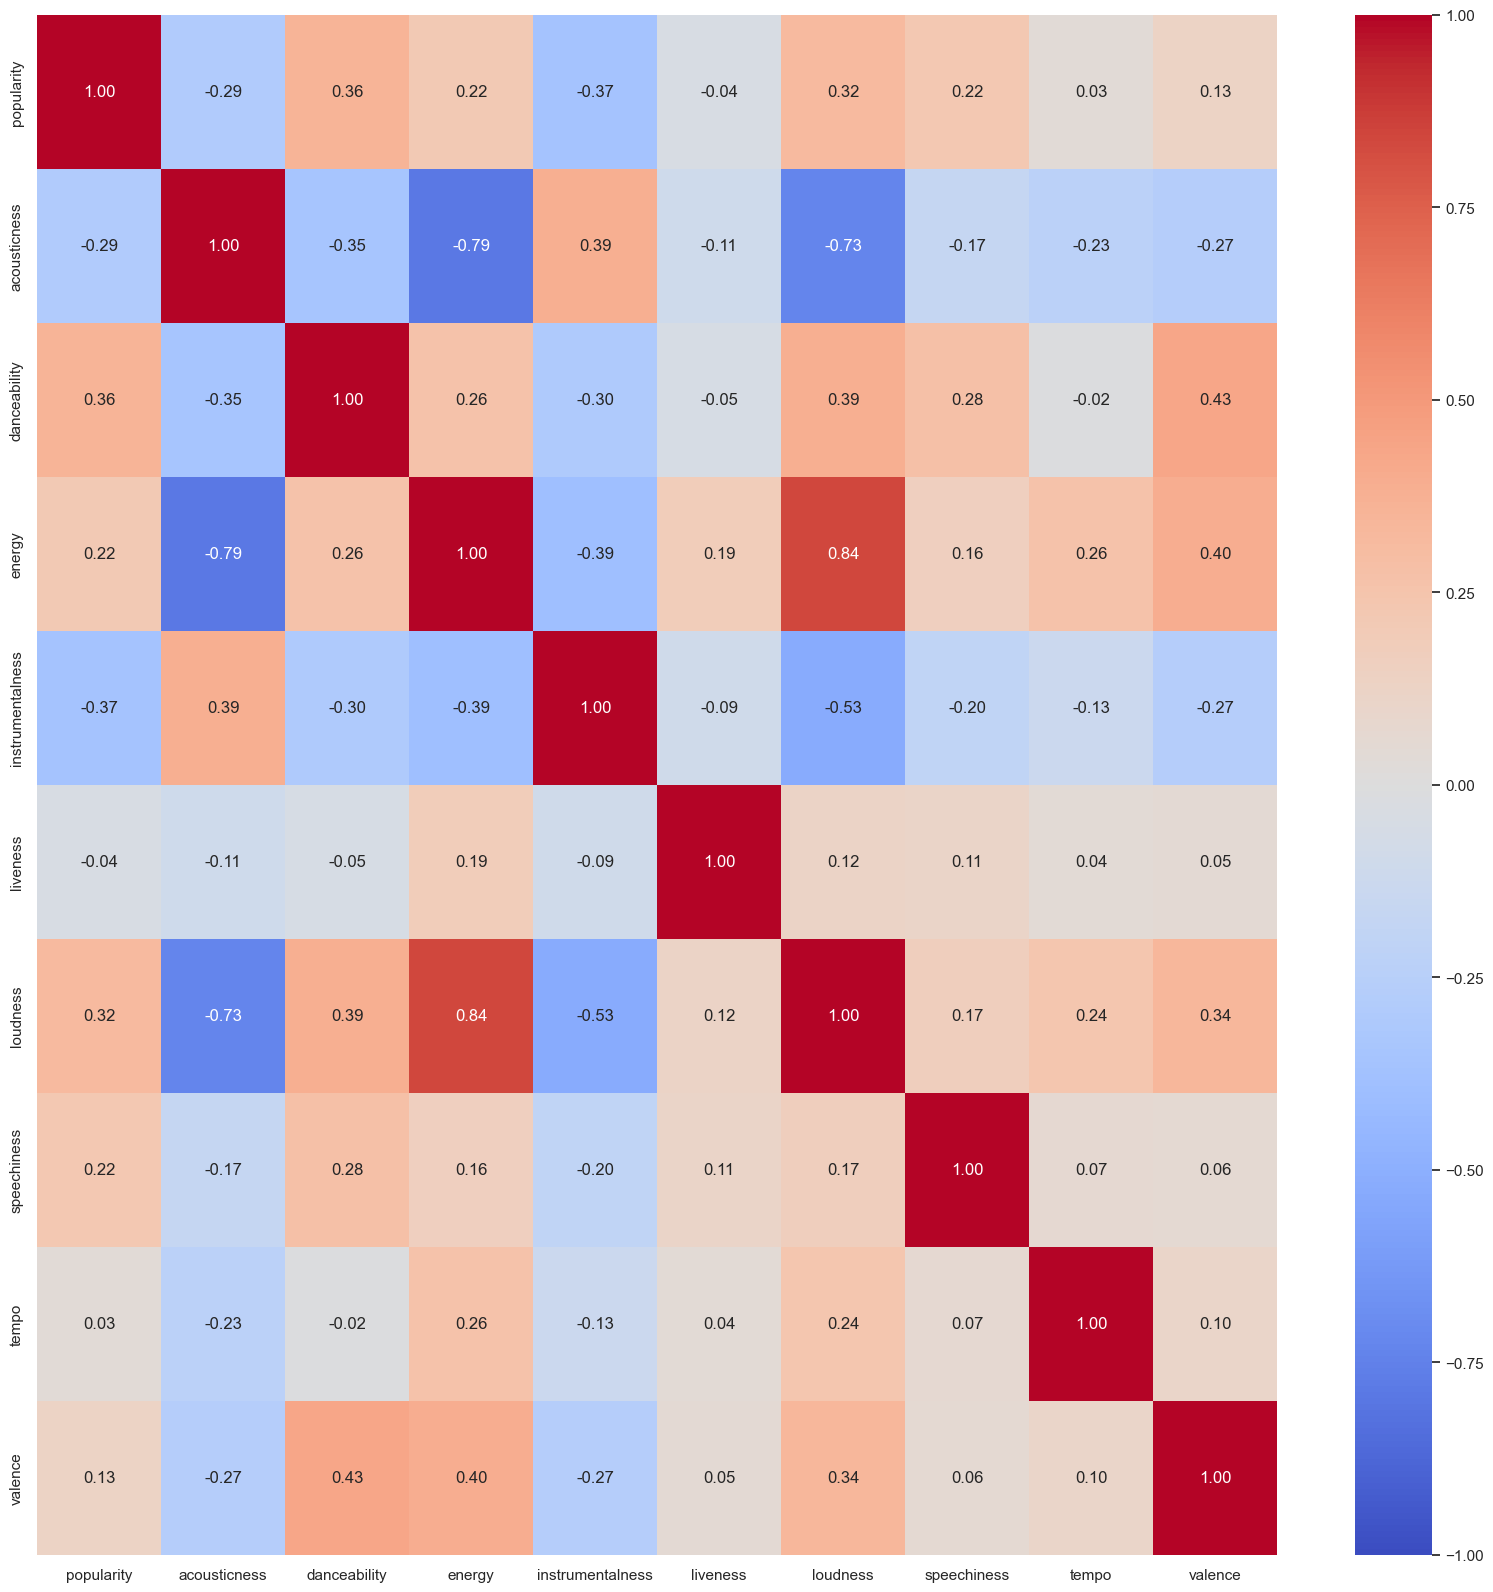

In [48]:
f = plt.figure(figsize = (20, 20))
sb.heatmap(music.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm', fmt = ".2f")

plt.show()

In [49]:
music_new = music.copy()
music_new['music_genre'] = music_df['music_genre']
music_new.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,0.941,0.79200,0.115,-5.201,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,0.890,0.95000,0.124,-7.043,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,0.755,0.01180,0.534,-4.617,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,0.700,0.00253,0.157,-4.498,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,0.587,0.90900,0.157,-6.266,0.0413,145.036,0.323,Electronic


### Number of unique music genres in the dataset

Number of genres in the Dataset : 10
music_genre
Rock           4561
Jazz           4521
Hip-Hop        4520
Rap            4504
Classical      4500
Anime          4497
Alternative    4495
Country        4486
Blues          4470
Electronic     4466
Name: count, dtype: int64


C:\Users\aditd\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


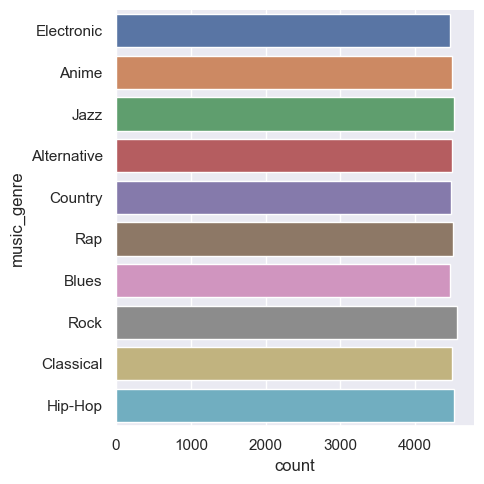

In [50]:
print("Number of genres in the Dataset :", len(music_new["music_genre"].unique()))

print(music_new["music_genre"].value_counts())
sb.catplot(y = "music_genre", data = music_new, kind = "count")

### Boxplot representing each variable's relation with each music genre

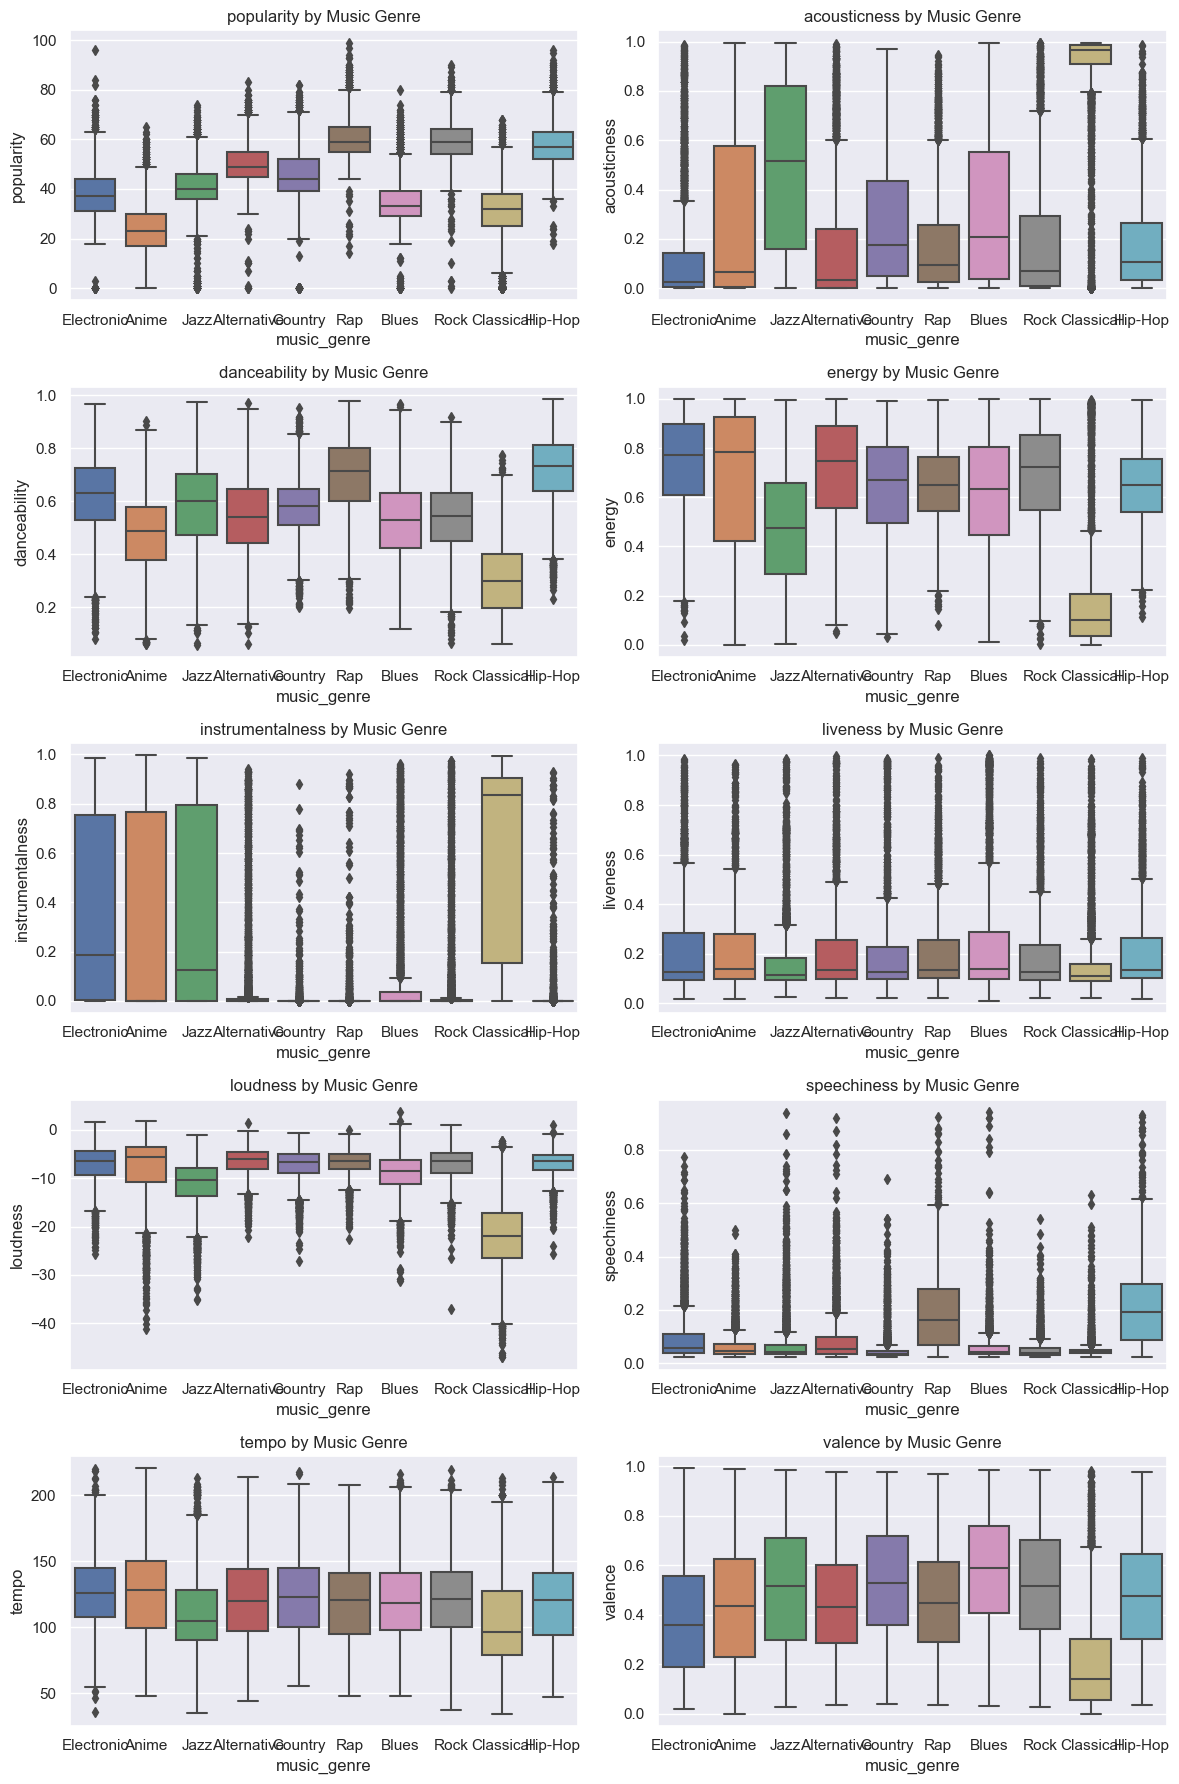

In [51]:
fig, axes = plt.subplots(5, 2, figsize=(12, 18))
axes = axes.flatten()

for i, var in enumerate(music_new.select_dtypes(include = 'float64')):
    sb.boxplot(x='music_genre', y = var, data = music_new, ax = axes[i])
    axes[i].set_title(f'{var} by Music Genre')
    
plt.tight_layout()
plt.show()

## Machine Learning

### Splitting Dataset into train and test set

In [52]:
music_genre = pd.DataFrame(music_df["music_genre"])
x_train, x_test, y_train, y_test = train_test_split(music, music_genre, test_size = 0.3)

### Random Forest Classifier model

In [53]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred_train_rf = rf.predict(x_train)
y_pred_rf = rf.predict(x_test)
print("Accuracy of Random Forest Classifier(Train set): ", accuracy_score(y_train, y_pred_train_rf) * 100, "%", sep = "")
print("Accuracy of Random Forest Classifier(Test set): ", accuracy_score(y_test, y_pred_rf) * 100, "%", sep = "")

C:\Users\aditd\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy of Random Forest Classifier(Train set): 96.83632671193755%
Accuracy of Random Forest Classifier(Test set): 54.20553827928328%


### Confusion matrix of Random Forest Classifier model

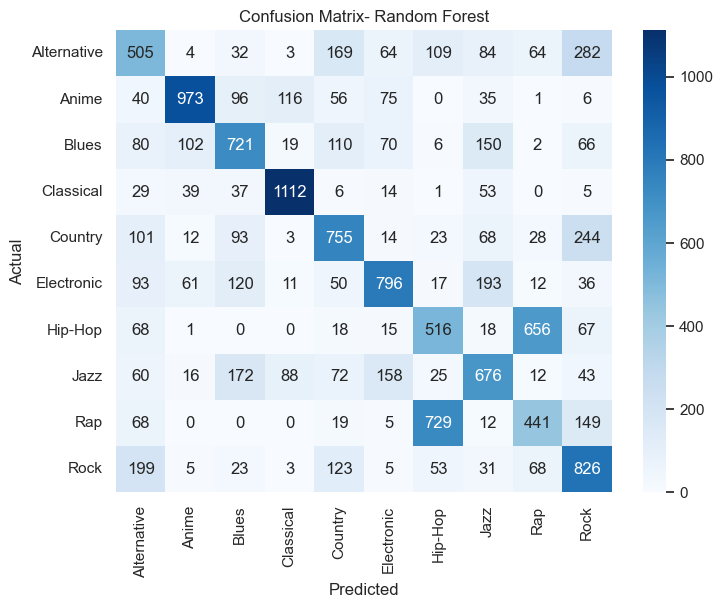

In [54]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize = (8, 6))
sb.heatmap(cm, annot = True, fmt = "d", cmap = "Blues", xticklabels = rf.classes_, yticklabels = rf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix- Random Forest")
plt.show()

### Gaussian Naive Bayes model

In [55]:
g = GaussianNB()
g.fit(x_train, y_train)

y_pred_train_g = g.predict(x_train)
y_pred_g = g.predict(x_test)
print("Accuracy of Gaussian Naive Bayes(Train set): ", accuracy_score(y_train, y_pred_train_g) * 100, "%", sep = "")
print("Accuracy of Gaussian Naive Bayes(Test set): ", accuracy_score(y_test, y_pred_g) * 100, "%", sep = "")

Accuracy of Gaussian Naive Bayes(Train set): 43.10147870787586%
Accuracy of Gaussian Naive Bayes(Test set): 43.573226714053014%


C:\Users\aditd\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Confusion matrix for Gaussian Naive Bayes model

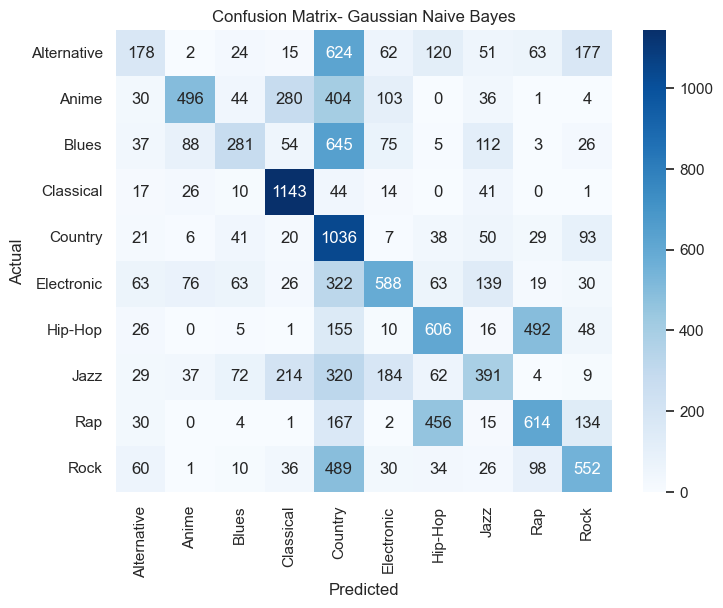

In [56]:
cm = confusion_matrix(y_test, y_pred_g)

plt.figure(figsize = (8, 6))
sb.heatmap(cm, annot = True, fmt = "d", cmap = "Blues", xticklabels = rf.classes_, yticklabels = rf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix- Gaussian Naive Bayes")
plt.show()

### Decision Tree Classifier model

In [57]:
d = DecisionTreeClassifier()
d.fit(x_train, y_train)

y_pred_train_dt = d.predict(x_train)
y_pred_dt = d.predict(x_test)
print("Accuracy of Decision Tree Classifier(Train set): ", accuracy_score(y_train, y_pred_train_dt) * 100, "%", sep = "")
print("Accuracy of Decision Tree Classifier(Test set): ", accuracy_score(y_test, y_pred_dt) * 100, "%", sep = "")

Accuracy of Decision Tree Classifier(Train set): 96.83632671193755%
Accuracy of Decision Tree Classifier(Test set): 42.85502739523175%


### Confusion matrix for Decision Tree model

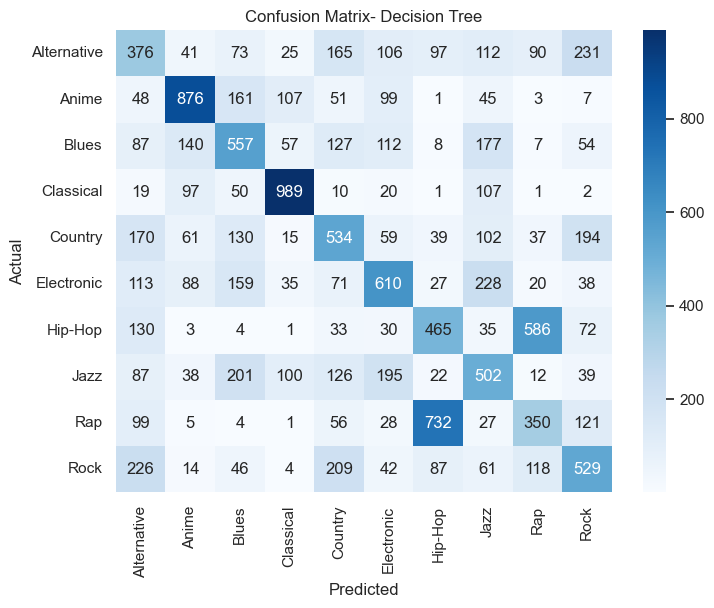

In [58]:
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize = (8, 6))
sb.heatmap(cm, annot = True, fmt = "d", cmap = "Blues", xticklabels = rf.classes_, yticklabels = rf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix- Decision Tree")
plt.show()

### Gradient Boosting Classifier model

In [59]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

y_pred_train_gbc = gbc.predict(x_train)
y_pred_gbc = gbc.predict(x_test)
print("Accuracy of Gradient Boosting Classifier(Train set): ", accuracy_score(y_train, y_pred_train_gbc) * 100, "%", sep = "")
print("Accuracy of Gradient Boosting Classifier(Test set): ", accuracy_score(y_test, y_pred_gbc) * 100, "%", sep = "")

C:\Users\aditd\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Gradient Boosting Classifier(Train set): 63.000571174716%
Accuracy of Gradient Boosting Classifier(Test set): 57.263438471790316%


### Confusion matrix for Gradient Boosting Classifier model

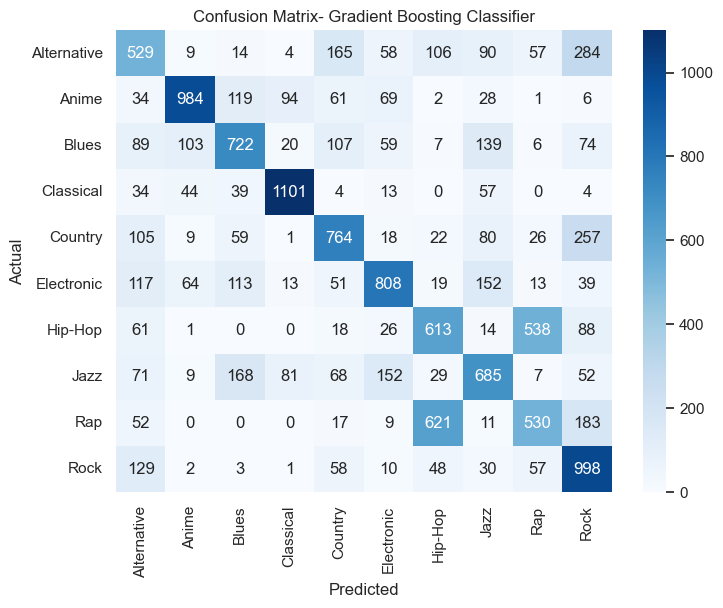

In [60]:
cm = confusion_matrix(y_test, y_pred_gbc)

plt.figure(figsize = (8, 6))
sb.heatmap(cm, annot = True, fmt = "d", cmap = "Blues", xticklabels = rf.classes_, yticklabels = rf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix- Gradient Boosting Classifier")
plt.show()